# What attributes are important for a good beer?

## 1. Objective

The goal is to find out what attributes are important for a good beer. The dataset used in this notebook can be found here: https://www.kaggle.com/rdoume/beerreviews. The dataset contains 1.5 million beer reviews. Linear regression will be used for this analysis.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("beer_reviews.csv")

## 2. Understanding the data

In [97]:
print(df.head(1))


   brewery_id     brewery_name  review_time  review_overall  review_aroma  \
0       10325  Vecchio Birraio   1234817823             1.5           2.0   

   review_appearance review_profilename  beer_style  review_palate  \
0                2.5            stcules  Hefeweizen            1.5   

   review_taste     beer_name  beer_abv  beer_beerid  
0           1.5  Sausa Weizen       5.0        47986  


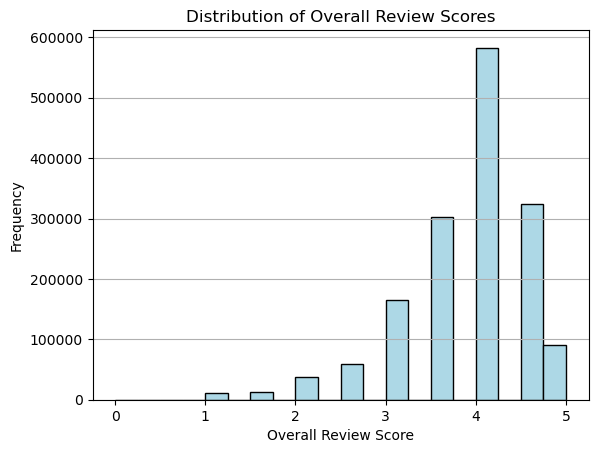

In [98]:
# distribution of review scores
plt.hist(df['review_overall'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Overall Review Scores')
plt.xlabel('Overall Review Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## 3. Data Preparation

Picking out the important attributes from the dataset:

In [99]:
df_clean = df[['beer_abv', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']].dropna()

Making sure that there are no missing values in the dataset.

In [100]:
print("Missing values:")
print(df_clean.isnull().sum())

Missing values:
beer_abv             0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
dtype: int64


## 4. Modeling 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Defining the feature set (X) and target variable (y)
X_overall = df_clean[['beer_abv', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]
y_overall = df_clean['review_overall']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_overall)

# Splitting the data into training and testing sets
X_train_overall, X_test_overall, y_overall_train, y_overall_test = train_test_split(X_scaled, y_overall, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()
model.fit(X_train_overall, y_overall_train)

# Predicting the target variable
y_overall_pred = model.predict(X_test_overall)



## 5. Evaluation

Mean Squared Error: 0.1695973774458259
R^2 Score: 0.670062002923012
Multipliers: [-0.09629815  0.05328001  0.02964115  0.18387812  0.40358447]


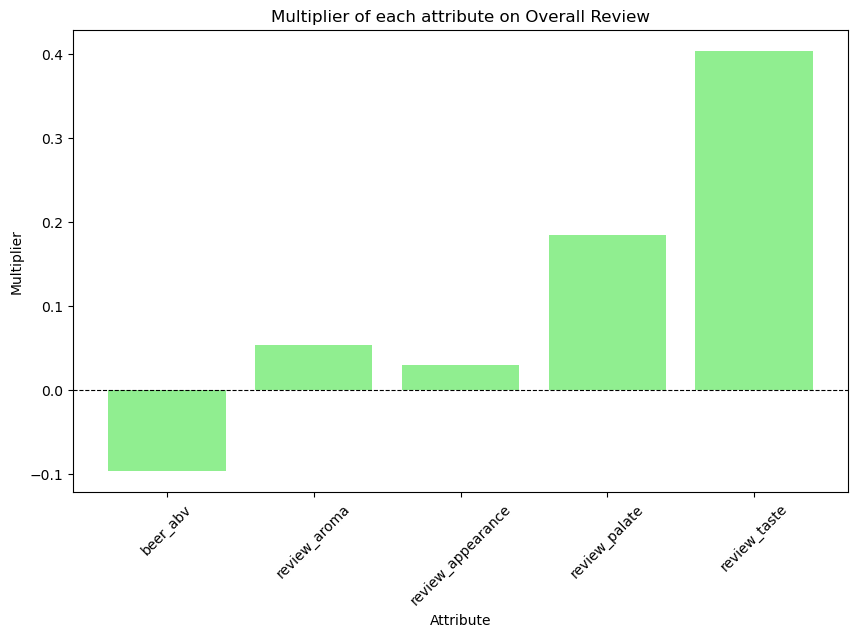

In [102]:
# performance evaluation
mse_overall = mean_squared_error(y_overall_test, y_overall_pred)
r2_overall = r2_score(y_overall_test, y_overall_pred)

print(f'Mean Squared Error: {mse_overall}')
print(f'R^2 Score: {r2_overall}')

# Multipliers of each attribute on Overall Review
coeff_overall = model.coef_
print(f'Multipliers: {coeff_overall}')

# Plotting Overall Review Coefficients
plt.figure(figsize=(10, 6))
plt.bar(X_overall.columns, coeff_overall, color='lightgreen')
plt.title('Multiplier of each attribute on Overall Review')
plt.ylabel('Multiplier')
plt.xlabel('Attribute')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

## 6. Conclusion